#                      1. Exercise          «Portfolio-Exam Part I»                MADS-MMS            Tom Wüsten

# Exercise 1. (Data Acquisition and Initial Data Analysis – 10 points)
 Obtain the dataset [1] from the UCI Machine Learning Repository.
Conduct a brief initial analysis of the raw dataset (henceforth called Dataset 𝐴).

Import libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns

Import data

In [2]:
df = pd.read_csv('Live_20210128.csv', sep = ",")
df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Preprocessing data
1. Check if nan values in data
-   Result: columns1-4 have na Values
2. Check for columns1-4 if all values are na
-   all values in Columns1-4 are nan values
-   so we can drop this 4 columns 

In [3]:
nan_values_columns = df.isna().any()
print (nan_values_columns)
result_na_columns = df[:-4].isna().any()
print(result_na_columns)
df.drop(columns=df.columns[-4:],axis=1,inplace=True)
df.head()

status_id           False
status_type         False
status_published    False
num_reactions       False
num_comments        False
num_shares          False
num_likes           False
num_loves           False
num_wows            False
num_hahas           False
num_sads            False
num_angrys          False
Column1              True
Column2              True
Column3              True
Column4              True
dtype: bool
status_id           False
status_type         False
status_published    False
num_reactions       False
num_comments        False
num_shares          False
num_likes           False
num_loves           False
num_wows            False
num_hahas           False
num_sads            False
num_angrys          False
Column1              True
Column2              True
Column3              True
Column4              True
dtype: bool


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


1.1 (2 points) What do the rows of the dataset represent?

In [4]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Get unique post types

In [5]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Every row represent a post. This post can be a video, photo, link or a status. Every post got various attributes like status_published, num_reactions or num_comments

1.2 (2 points) How many different instances does the dataset contain?

The dataset contains 7050 instances.

In [6]:
unique_instances = df['status_id'].unique()
number_of_rows = unique_instances.shape[0]
print('Number of Rows : ', number_of_rows)

Number of Rows :  7050


1.3 (2 points) How many attributes (columns) are in the dataset?

The dataset contains 12 attributes

In [7]:
number_of_columns = df.shape[1]
print('Number of Columns : ', number_of_columns)

Number of Columns :  12


1.4 (4 points) What is the standard deviation of the feature num_likes?

The Standard deviation of the feature num likes is 449.472

In [8]:
sd_num_likes = df['num_likes'].std()
print('The Standard deviation of the feature num likes is:',sd_num_likes )

The Standard deviation of the feature num likes is: 449.47235705614156


# Exercise 2. (k-Means Clustering on the Plain Data – 40 points)
Begin the analysis using the k-means approach.

2.1 (5 points) Which features of the dataset do not suggest themselves as features analysis? For each of these features, brieﬂy state why you exclude them.

The status_id has no value because it's an id and every instances has a different id. The status_type 
The status_published has no value because time of the post is not important
The first three columns status_id, status_type and status_published aren't interesting in the feature analysis.

2.2 (15 points) For the next tasks, restrict Dataset 𝐴 to the following features: num_reactions,
num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas.
We will call this Dataset 𝐵.
On 𝐵, compute k-means clusterings of the dataset using different choices for 𝑘 : 2, 3, . . . , 10.
Use a seed of 1 to make the experiments reproducible. For each 𝑘 compute the silhouette
coefﬁcient and plot it against 𝑘 in a diagram. Interpret the diagram!

Create Dataset B as df_b

In [40]:
df_b = df.iloc[:,3:10]
df_unscaled = df_b

Function to calclulate the silhouette score

In [10]:
def calculate_silhouette_score(k_min,k_max,df):
    silhouettes=[]
    i = k_min
    for i in range(k_min,k_max+1):   
        kmeans=KMeans(n_clusters=i, random_state=1) # <- by default, this runs k-means++, starting over 10 times, reporting the best result
        y_pred = kmeans.fit_predict(df)
        silhouettes.append(silhouette_score(df,y_pred))
    return kmeans,silhouettes

function for plotting the silhouette score against k

In [11]:
def plot_silhouette_score(k_min,k_max,silhouette):
    plt.xlabel('k')
    plt.ylabel('Silhouette Coefﬁcient')
    plt.plot(range(k_min,k_max+1), silhouette)
    return plt.show()

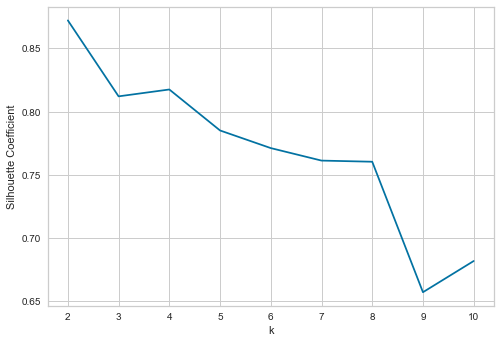

In [12]:
k_min = 2
k_max = 10
kmeans,silhouette = calculate_silhouette_score(k_min,k_max,df_b)
plot_silhouette_score(k_min,k_max,silhouette)

## Observations
1. We might have expected k=4 to yield the best results, because the dataset has 4 different kinds of status_types
2. We see that k=2 has the highest silhouette coefficient, but also k=3 & k=4 have a high silhouette coefficient
3. We also see that the silhouette coefficient till k= 8 is above 0.7. The lecture we defined that sc > 0.7 means that we have a strong structure

2.3 (10 points) Create a silhouette plot for the 𝑘 with the highest silhouette coefﬁcient in the
previous experiment. Interpret the diagram!

In [13]:
def visualize_silhouette_score(kmeans,color,X):
    visualizer = SilhouetteVisualizer(kmeans, colors=color, is_fitted=True)
    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.finalize()
    print(f'Silhoutte score: {visualizer.silhouette_score_}')
    return visualizer.show()        # Finalize and render the figure

[0.8721940910132095]


C:\Users\wuest\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Silhoutte score: 0.8721940910132095


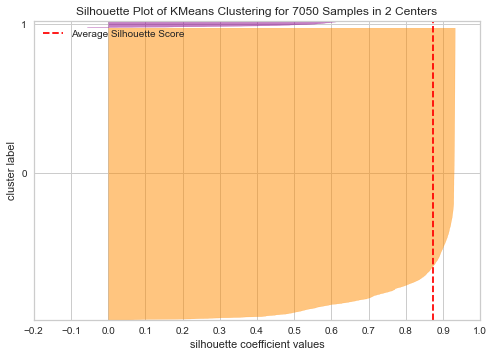

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7050 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
colors=['darkorange', 'darkmagenta']
kmeans,silhouette = calculate_silhouette_score(2,2,df_b)
print(silhouette)
visualize_silhouette_score(kmeans,colors,df_b)

2.4. (10 points) For the same 𝑘, create a plot of the data where you use only the two features
num_reactions and num_likes as the axes. Use color to distinguish instances from
different clusters. Also highlight the cluster centroids of the k-means clustering. Interpret the
diagram, considering only the above two features. Is there a clear clustering structure visible?

Slice data into two columns

In [15]:
df_b2 = df_b[["num_reactions", "num_likes"]]
df_b2.head() 

,num_reactions,num_likes
0,529,432
1,150,150
2,227,204
3,111,111
4,213,204


In [16]:
def plot_clusters_with_centers(kmeans, X):
    plt.figure(figsize=(8, 8))
    y_pred = kmeans.fit_predict(X)
    for i in range(0,len(np.unique(y_pred))):
        plt.scatter(X.iloc[y_pred==i, 0], X.iloc[y_pred==i, 1], c=colors[i], label=i)

    plt.xlabel("Num_reactions")
    plt.ylabel("Num_likes")
    plt.scatter(
        kmeans.cluster_centers_[:, 0], 
        kmeans.cluster_centers_[:, 1],
        s=350, marker='*', c='crimson', edgecolor='black'
      

    )

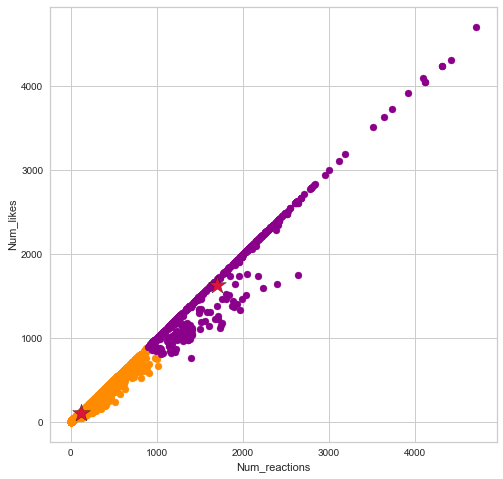

In [17]:
colors=['darkorange', 'darkmagenta']
kmeans,silhouette = calculate_silhouette_score(2,2,df_b2)
plot_clusters_with_centers(kmeans, df_b2)
#kmeans

## Observations
1. We see that the number of Likes is growing linear with the number of reactions.
2. Regards to Facebook post that makes total sense, because if a post has more likes in genral more people see that post and react to this
3. The clustering structure is not clear visible.


# Exercise 3. (Scaling and Feature Selection – 50 points)
In these next experiments, we preprocess and restrict Dataset 𝐵 further through scaling and using variance as a criterion for feature selection. Particularly, use the class
sklearn.feature_selection.VarianceThreshold.

3.1 (10 points) Describe in your own words, what the class VarianceThreshold is used for and
explain why looking at a feature’s variance is meaningful.

The class VarianceThreshold drops column where the Variance is under a specific choosen threshold. Variance shows the variability in a distribution. In context of features it shows us how much spread has this feature. If it has a variance of 0 then the information is not meaningful. But if the variance is high then those feature provides more information.  
Variance Theshold contains to the field of feature selection. Feature selection describes the process of choosing the most important features while trying to retain as much information as possible. 

3.2 (5 points) The features of the dataset are in different ranges. To be able to compare by variance
we should scale the data ﬁrst. Which is the better choice for the variance threshold method
Min-Max-Scaling or the Standard-Scaler (z-score transformation)? Explain your answer.

It's important to take the MinMaxScaler becaue we want to compare the coulmns later with the VarianceThreshold. If we would take the Standard-Scaler we 

3.3 (10 points) Use Min-Max-Scaling on Dataset 𝐵 to yield Dataset 𝐶 and rerun the above
experiments on 𝐶 (k-means clusterings for 𝑘 “2, 3, . . . , 10, silhouette plot for the best 𝑘, plot
of clustered data and centroids). How does that compare to the previous experiments?

In [18]:
scaler = MinMaxScaler()
scaler.fit(df_b)
df_b[df_b.columns] = scaler.fit_transform(df_b[df_b.columns])
df_b

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000
...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000


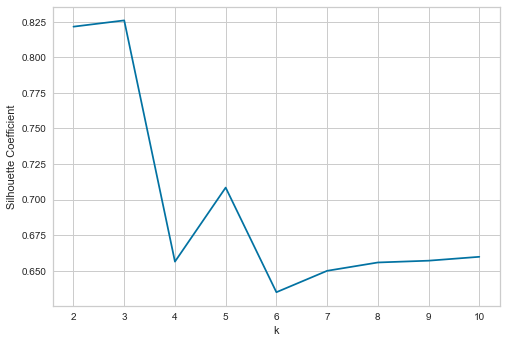

In [19]:
k_min = 2
k_max = 10
kmeans,silhouette = calculate_silhouette_score(k_min,k_max,df_b)
plot_silhouette_score(k_min,k_max,silhouette)


## Observations
1. We see that for k=2 and k=3 are the highest silhouette coefficent. Both are sc> 0.75 that means that they have a good structure.
2. In Comparison to the unscaled data the silhoette coeffiecent drops at k=4 and is under sc< 0.75. The rest of the k have also a lower sc< 0.75. In the unscaled data k=2 - k= 8 had a sc< 0.75.
3. Also k = 3 has now the highest sc score and will be used for the next diagram.

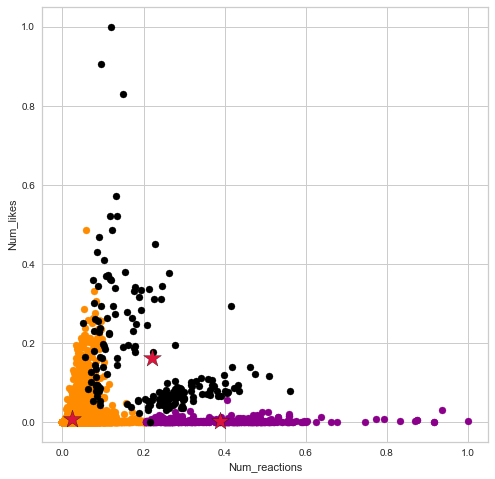

In [20]:
k_best = 3
colors=['darkorange', 'darkmagenta','black', 'green', 'lime', 'blue', 'lavender', 'indigo','magenta','pink']
kmeans,silhouette = calculate_silhouette_score(k_best,k_best,df_b)
plot_clusters_with_centers(kmeans, df_b)

3.4 (10 points) Use the variance threshold method for feature selection on the scaled data to restrict
the features further. Set the variance threshold to 0.005. Which features does the resulting
dataset (Dataset 𝐷) include, what is their variance (computed on the scaled features)?

In [21]:
df_b.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000


In [22]:
selector = VarianceThreshold(threshold=0.005)
df_d  = selector.fit_transform(df_b)
print(selector.get_support())
df_d = pd.DataFrame(df_d,columns=["num_reactions", "num_likes"]) 
df_d
# calculate variance


[ True False False  True False False False]


,num_reactions,num_likes
0,0.112314,0.091720
1,0.031847,0.031847
2,0.048195,0.043312
3,0.023567,0.023567
4,0.045223,0.043312
...,...,...
7045,0.018896,0.018896
7046,0.003397,0.002972
7047,0.000425,0.000212
7048,0.074522,0.074098


After computing the variance threshold we drop 5 columns.  The command "selector.get_support()" shows which feature are true for the variance threshold. Only the columns num_reactions and num_likes are meaningful.

3.5 (5 points) Repeat the experiments from above on Dataset 𝐷 (k-means clusterings for 𝑘 “
2, 3, . . . , 10, silhouette plot for the best 𝑘, plot of clustered data and centroids). Compare the
outcome to the previous experiments.

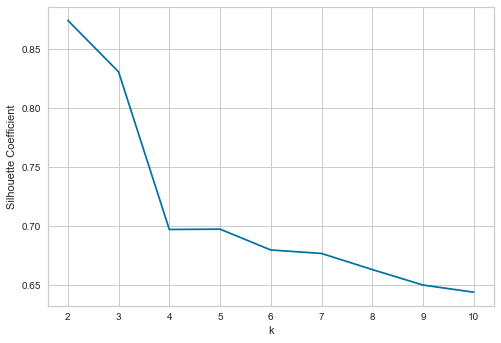

In [23]:
k_min = 2
k_max = 10
kmeans,silhouette = calculate_silhouette_score(k_min,k_max,df_d)
plot_silhouette_score(k_min,k_max,silhouette)

## Observations
1. We see that for k=2 and k=3 are the highest silhouette coefficent. Both are sc> 0.75 that means that they have a good structure.
2. In Comparison to the unscaled data the silhoette coeffiecent drops at k=4 and is under sc< 0.75. The rest of the k have also a lower sc< 0.75. In the unscaled data k=2 - k= 8 had a sc< 0.75.
3. Also k = 3 has now the highest sc score and will be used for the next diagram.

3.6. (10 points) Compare the feature distributions over the clusters for features num_reactions,
num_likes, and num_shares. Use violin plots for the original data (the unscaled values)
and interpret your results.

In [42]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


num_reactions                    num_comments                      \
                   min         mean   max          min         mean    max   
cluster4                                                                     
0                    0   110.424640  1012            0    78.817966   1431   
1                  922  1723.028322  4710            0   226.566449   2059   
2                   76   465.364035  2399         1374  2806.508772   5516   
3                  249   678.450000  1959         5757  8486.650000  20990   

         num_shares                   num_likes  ...       num_loves  \
                min        mean   max       min  ...   max       min   
cluster4                                         ...                   
0                 0   19.884074   564         0  ...   906         0   
1                 0   78.296296  1260       765  ...  4710         0   
2                29  420.570175  3424        64  ...  1739         6   
3                25  615.100000  1379       161  ...  1737         5   

                          num_wows                num_hahas                 
                mean  max      min      mean  max       min      mean  max  
cluster4                                                                    
0           7.257315  220        0  0.576309  111         0  0.361854  102  
1          34.350763  657        0  7.407407  278         0  1.856209  157  
2         100.622807  529        0  7.850877  252         0  6.280702  100  
3         128.500000  282        0  6.400000   57         1  8.450000   17  

[4 rows x 21 columns]

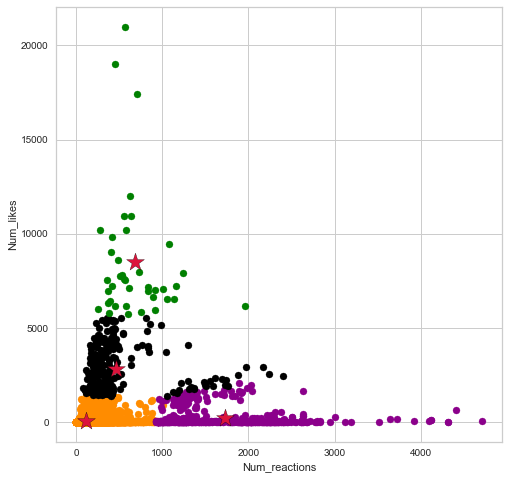

In [44]:
kmeans,silhouette = calculate_silhouette_score(4,4,df_unscaled)
plot_clusters_with_centers(kmeans, df_unscaled)
labels_4 = kmeans.predict(df_unscaled)
df_unscaled['cluster4'] = labels_4
df_unscaled[["num_reactions","num_likes", "num_shares", "cluster4"]]
df_unscaled.groupby('cluster4').aggregate(['min', 'mean', 'max'])

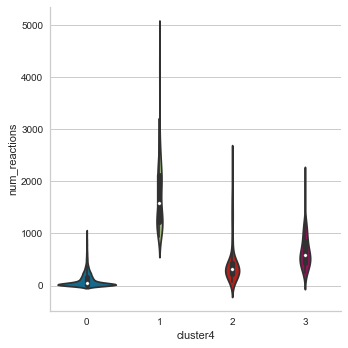

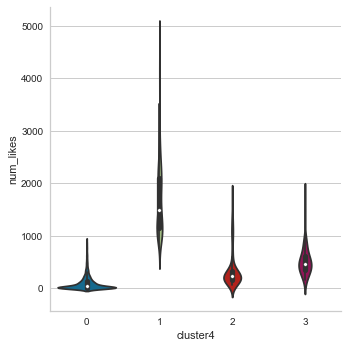

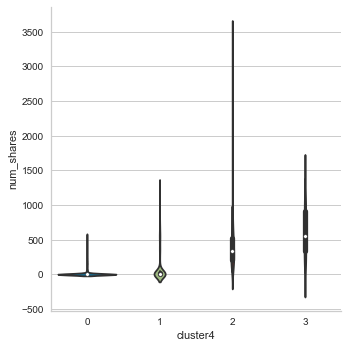

In [45]:
sns.catplot(x='cluster4', y='num_reactions',
                data=df_unscaled, kind="violin");
sns.catplot(x='cluster4', y='num_likes',
                data=df_unscaled, kind="violin");
sns.catplot(x='cluster4', y='num_shares',
                data=df_unscaled, kind="violin");
                

In [25]:
""" kmeans,silhouette = calculate_silhouette_score(2,2,df_3)
plot_clusters_with_centers(kmeans, df_3)
print(kmeans)
labels_3 = kmeans.predict(df_3[:,[1, 2]]) """

' kmeans,silhouette = calculate_silhouette_score(2,2,df_3)\nplot_clusters_with_centers(kmeans, df_3)\nprint(kmeans)\nlabels_3 = kmeans.predict(df_3[:,[1, 2]]) '